<img heigth="8" src="https://i.imgur.com/826AqJI.png" alt="pbs-enae">

<h1 align="left">Praparación de datos</h1>

<h2 align="left"><i>Estrategias de marketing basadas en datos</i></h2>

<p align="left">
  <h3>Joseph F. Vergel-Becerra | Introducción a Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>23/02/2023</i>
  <br><br>
  <!-- <a href="#tabla-de-contenido">Tabla de contenido</a> • -->
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <!-- <a href="#agradecimientos">Agradecimientos</a> -->
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/5-python-data-engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-ml-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-ingesta"><b>Ingesta</b></a></li>
    <li><a href="#3-integracion"><b>Integración</b></a></li>
    <li><a href="#4-limpieza"><b>Limpieza: Imputación de valores faltantes</b></a></li>
    <li><a href="#5-transformacion"><b>Transformación</b></a></li>
    <li><a href="#ejercicios"><b>Ejercicios caso práctico: "Preparación de datos"</b></a></li>
</ol>

<a id="1-preludio"></a>
## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


<a id="2-ingesta"></a>
## 2. Ingesta de datos

La ingesta de datos a través de archivos es una práctica común en la gestión de información. Consiste en la importación de datos desde archivos, ya sean de texto, hojas de cálculo, bases de datos o cualquier otro formato, a un sistema o aplicación para su posterior procesamiento y análisis. Esta técnica es esencial para la mayoría de las empresas y organizaciones, ya que les permite recolectar y gestionar grandes cantidades de información de manera eficiente. En esta ocasión ingestaremos un base de datos de clientes del sector bancario.

In [2]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "splitted-banking-marketing-targets" # 
DATA_PATH = f"datasets/{DATASET}/"


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'splitted-banking-marketing-targets' downloaded and uncompressed correctly!


In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/splitted-banking-marketing-targets/":

['cd.csv', 'personal.csv', '.DS_Store', 'last_contact.csv', 'history.csv', 'campaigns.csv']


<a id="3-integracion"></a>
## 3. Integración de datos

La etapa de integración de datos se refiere al proceso de combinar datos de diferentes fuentes para crear un conjunto unificado y coherente, adecuado para el análisis o la operación deseada. Este proceso es fundamental en proyectos de ciencia de datos y análisis, donde los datos pueden provenir de múltiples fuentes, formatos y estructuras. El Stack PyData, que incluye herramientas y bibliotecas como **pandas** y  **NumPy**, es invaluable en esta etapa. **Pandas**, en particular, ofrece una amplia variedad de funciones para manipular, transformar y combinar datasets, permitiendo a los usuarios integrar datos con facilidad. Funciones como `merge`, `join` y `concat` en **pandas** facilitan la unión de datasets de diferentes fuentes, mientras que su capacidad para interactuar con múltiples formatos de archivo (como CSV, Excel, SQL y otros) hace que la ingestión y exportación de datos sea un proceso fluido. En conjunto, el Stack PyData proporciona un arsenal robusto para la integración eficiente de datos en proyectos de análisis y ciencia de datos.

In [4]:
import glob
import numpy as np
import pandas as pd


file_paths = glob.glob("datasets/splitted-banking-marketing-targets/*.csv")

for file_path in file_paths:
    if file_path.endswith('cd.csv'):
        display(pd.read_csv(file_path).T)
    else:
        display(pd.read_csv(file_path))

,0,1
Unnamed: 0,id,cd
0,870ab05e,no
1,c9bb4b13,no
2,47d876ed,no
3,98a9ccbb,no
...,...,...
49727,aea41704,no
49728,8ce3469d,no
49729,b377bb79,no
49730,56b7a9b1,no


,id,age,job,marital,education
0,870ab05e,58,management,married,tertiary
1,c9bb4b13,44,technician,single,secondary
2,47d876ed,33,entrepreneur,married,secondary
3,98a9ccbb,47,blue-collar,married,unknown
4,5c2fa312,33,unknown,single,unknown
...,...,...,...,...,...
49727,aea41704,33,services,married,secondary
49728,8ce3469d,57,self-employed,married,tertiary
49729,b377bb79,57,technician,married,secondary
49730,56b7a9b1,28,blue-collar,married,secondary


,id,contact,day,month,duration
0,870ab05e,unknown,5,may,261
1,c9bb4b13,unknown,5,may,151
2,47d876ed,unknown,5,may,76
3,98a9ccbb,unknown,5,may,92
4,5c2fa312,unknown,5,may,198
...,...,...,...,...,...
49727,aea41704,cellular,30,jul,329
49728,8ce3469d,unknown,9,may,153
49729,b377bb79,cellular,19,aug,151
49730,56b7a9b1,cellular,6,feb,129


,Unnamed: 0,id,default,balance,housing,loan
0,0,870ab05e,no,2143,yes,no
1,1,c9bb4b13,no,29,yes,no
2,2,47d876ed,no,2,yes,yes
3,3,98a9ccbb,no,1506,yes,no
4,4,5c2fa312,no,1,no,no
...,...,...,...,...,...,...
49727,49727,aea41704,no,-333,yes,no
49728,49728,8ce3469d,yes,-3313,yes,yes
49729,49729,b377bb79,no,295,no,no
49730,49730,56b7a9b1,no,1137,no,no


,Unnamed: 0,id,campaign,pdays,previous,poutcome
0,0,870ab05e,1,-1,0,unknown
1,1,c9bb4b13,1,-1,0,unknown
2,2,47d876ed,1,-1,0,unknown
3,3,98a9ccbb,1,-1,0,unknown
4,4,5c2fa312,1,-1,0,unknown
...,...,...,...,...,...,...
49727,49727,aea41704,5,-1,0,unknown
49728,49728,8ce3469d,1,-1,0,unknown
49729,49729,b377bb79,11,-1,0,unknown
49730,49730,56b7a9b1,4,211,3,other


In [5]:
cd = pd.read_csv("datasets/splitted-banking-marketing-targets/cd.csv")
cd = cd.T
cd.drop(['Unnamed: 0'], axis=0, inplace=True)
cd = cd.rename(columns={0: 'id', 1: 'cd'})
cd

,id,cd
0,870ab05e,no
1,c9bb4b13,no
2,47d876ed,no
3,98a9ccbb,no
4,5c2fa312,no
...,...,...
49727,aea41704,no
49728,8ce3469d,no
49729,b377bb79,no
49730,56b7a9b1,no


In [6]:
personal = pd.read_csv("datasets/splitted-banking-marketing-targets/personal.csv")
personal

,id,age,job,marital,education
0,870ab05e,58,management,married,tertiary
1,c9bb4b13,44,technician,single,secondary
2,47d876ed,33,entrepreneur,married,secondary
3,98a9ccbb,47,blue-collar,married,unknown
4,5c2fa312,33,unknown,single,unknown
...,...,...,...,...,...
49727,aea41704,33,services,married,secondary
49728,8ce3469d,57,self-employed,married,tertiary
49729,b377bb79,57,technician,married,secondary
49730,56b7a9b1,28,blue-collar,married,secondary


In [7]:
tmp = pd.merge(left=cd, right=personal, how='inner', on='id')
tmp

,id,cd,age,job,marital,education
0,870ab05e,no,58,management,married,tertiary
1,c9bb4b13,no,44,technician,single,secondary
2,47d876ed,no,33,entrepreneur,married,secondary
3,98a9ccbb,no,47,blue-collar,married,unknown
4,5c2fa312,no,33,unknown,single,unknown
...,...,...,...,...,...,...
49727,aea41704,no,33,services,married,secondary
49728,8ce3469d,no,57,self-employed,married,tertiary
49729,b377bb79,no,57,technician,married,secondary
49730,56b7a9b1,no,28,blue-collar,married,secondary


In [8]:
history = pd.read_csv(file_paths[3])
history = history.drop(['Unnamed: 0'], axis=1)
history

,id,default,balance,housing,loan
0,870ab05e,no,2143,yes,no
1,c9bb4b13,no,29,yes,no
2,47d876ed,no,2,yes,yes
3,98a9ccbb,no,1506,yes,no
4,5c2fa312,no,1,no,no
...,...,...,...,...,...
49727,aea41704,no,-333,yes,no
49728,8ce3469d,yes,-3313,yes,yes
49729,b377bb79,no,295,no,no
49730,56b7a9b1,no,1137,no,no


In [9]:
pd.merge(left=tmp, right=history, how='inner', on='id')

,id,cd,age,job,marital,education,default,balance,housing,loan
0,870ab05e,no,58,management,married,tertiary,no,2143,yes,no
1,c9bb4b13,no,44,technician,single,secondary,no,29,yes,no
2,47d876ed,no,33,entrepreneur,married,secondary,no,2,yes,yes
3,98a9ccbb,no,47,blue-collar,married,unknown,no,1506,yes,no
4,5c2fa312,no,33,unknown,single,unknown,no,1,no,no
...,...,...,...,...,...,...,...,...,...,...
49727,aea41704,no,33,services,married,secondary,no,-333,yes,no
49728,8ce3469d,no,57,self-employed,married,tertiary,yes,-3313,yes,yes
49729,b377bb79,no,57,technician,married,secondary,no,295,no,no
49730,56b7a9b1,no,28,blue-collar,married,secondary,no,1137,no,no


In [10]:
pd.concat([cd, personal[['age','job','marital', 'education']]], axis=0)

,id,cd,age,job,marital,education
0,870ab05e,no,NaN,NaN,NaN,NaN
1,c9bb4b13,no,NaN,NaN,NaN,NaN
2,47d876ed,no,NaN,NaN,NaN,NaN
3,98a9ccbb,no,NaN,NaN,NaN,NaN
4,5c2fa312,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
49727,NaN,NaN,33.0,services,married,secondary
49728,NaN,NaN,57.0,self-employed,married,tertiary
49729,NaN,NaN,57.0,technician,married,secondary
49730,NaN,NaN,28.0,blue-collar,married,secondary


In [11]:
# cd = pd.read_csv(file_path).T
file_paths

['datasets/splitted-banking-marketing-targets/cd.csv',
 'datasets/splitted-banking-marketing-targets/personal.csv',
 'datasets/splitted-banking-marketing-targets/last_contact.csv',
 'datasets/splitted-banking-marketing-targets/history.csv',
 'datasets/splitted-banking-marketing-targets/campaigns.csv']

In [12]:
pd.DataFrame(personal['id'], columns=['id'])

,id
0,870ab05e
1,c9bb4b13
2,47d876ed
3,98a9ccbb
4,5c2fa312
...,...
49727,aea41704
49728,8ce3469d
49729,b377bb79
49730,56b7a9b1


In [13]:
import glob

file_paths = glob.glob("datasets/splitted-banking-marketing-targets/*.csv")

def prepare_cd(file_path):
    cd = pd.read_csv(file_path)
    cd = cd.T
    cd.drop(['Unnamed: 0'], axis=0, inplace=True)
    cd = cd.rename(columns={0: 'id', 1: 'cd'})
    return cd



data = pd.DataFrame(personal['id'], columns=['id'])
for file_path in file_paths:
    if file_path.endswith('cd.csv'):
        tmp = prepare_cd(file_path)
    else:
        tmp = pd.read_csv(file_path)
    if 'Unnamed: 0' in list(tmp.columns):
        tmp.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

    data = pd.merge(left=data, right=tmp, on='id')

data

,id,cd,age,job,marital,education,contact,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,870ab05e,no,58,management,married,tertiary,unknown,5,may,261,no,2143,yes,no,1,-1,0,unknown
1,c9bb4b13,no,44,technician,single,secondary,unknown,5,may,151,no,29,yes,no,1,-1,0,unknown
2,47d876ed,no,33,entrepreneur,married,secondary,unknown,5,may,76,no,2,yes,yes,1,-1,0,unknown
3,98a9ccbb,no,47,blue-collar,married,unknown,unknown,5,may,92,no,1506,yes,no,1,-1,0,unknown
4,5c2fa312,no,33,unknown,single,unknown,unknown,5,may,198,no,1,no,no,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,aea41704,no,33,services,married,secondary,cellular,30,jul,329,no,-333,yes,no,5,-1,0,unknown
49728,8ce3469d,no,57,self-employed,married,tertiary,unknown,9,may,153,yes,-3313,yes,yes,1,-1,0,unknown
49729,b377bb79,no,57,technician,married,secondary,cellular,19,aug,151,no,295,no,no,11,-1,0,unknown
49730,56b7a9b1,no,28,blue-collar,married,secondary,cellular,6,feb,129,no,1137,no,no,4,211,3,other


In [14]:
data.to_excel('exported.xlsx', index=False)

In [15]:
data.to_csv('exported.csv', index=False)

In [16]:
np.ceil(len(data) * 0.1)

4974.0

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, train_size=0.9, shuffle=True, stratify=data['cd'].values)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [18]:
data['cd'].value_counts(normalize=True, dropna=False)

no     0.883174
yes    0.116826
Name: cd, dtype: float64

In [19]:
train['cd'].value_counts(normalize=True, dropna=False)

no     0.883172
yes    0.116828
Name: cd, dtype: float64

In [20]:
test['cd'].value_counts(normalize=True, dropna=False)

no     0.883193
yes    0.116807
Name: cd, dtype: float64

<a id="4-limpieza"></a>
## 4. Limpieza de datos: Imputación de valores faltantes

La imputación de datos es un proceso de ***reemplazo de valores faltantes*** en conjuntos de datos con valores estimados o predichos. Se utiliza en el análisis de datos para reducir el impacto de los datos faltantes en la precisión de los resultados y para ***garantizar que los datos sean completos y coherentes antes de su análisis***.

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

In [21]:
!pip install missingno

In [22]:
import os

import pandas as pd


# train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";")
# test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")

train.rename(columns={"y": "cd"}, inplace=True)
test.rename(columns={"y": "cd"}, inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    
    print(f"\n[INFO] testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (44758, 18)


,id,cd,age,job,marital,education,contact,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,9b9c8baa,yes,46,blue-collar,married,secondary,telephone,8,jul,576,no,922,yes,no,1,-1,0,unknown
1,15f5f67c,no,48,technician,married,secondary,cellular,29,jan,414,no,101,yes,no,2,192,3,failure
2,a9d47376,no,29,blue-collar,single,secondary,cellular,11,may,262,no,9,yes,no,3,-1,0,unknown
3,8278ef13,no,29,self-employed,single,secondary,cellular,28,jan,132,no,0,no,no,2,-1,0,unknown
4,dbee0db0,yes,69,retired,married,primary,cellular,4,feb,136,no,324,no,no,4,-1,0,unknown



[INFO] testing dataset dimnesions (rows, cols): (4974, 18)


,id,cd,age,job,marital,education,contact,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,b3b494ee,no,31,technician,single,secondary,cellular,27,aug,313,no,46,no,no,6,-1,0,unknown
1,ee7f27b2,no,41,technician,single,unknown,cellular,12,may,127,no,3652,yes,no,1,363,2,success
2,657879f1,yes,64,retired,married,secondary,cellular,20,apr,1422,no,571,yes,no,2,-1,0,unknown
3,62f01744,no,38,admin.,single,secondary,unknown,6,may,211,no,221,yes,no,2,-1,0,unknown
4,2d20aeba,yes,47,management,single,tertiary,cellular,5,aug,253,no,86,no,no,1,97,4,success


In [23]:
import missingno as msno
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

<AxesSubplot:>

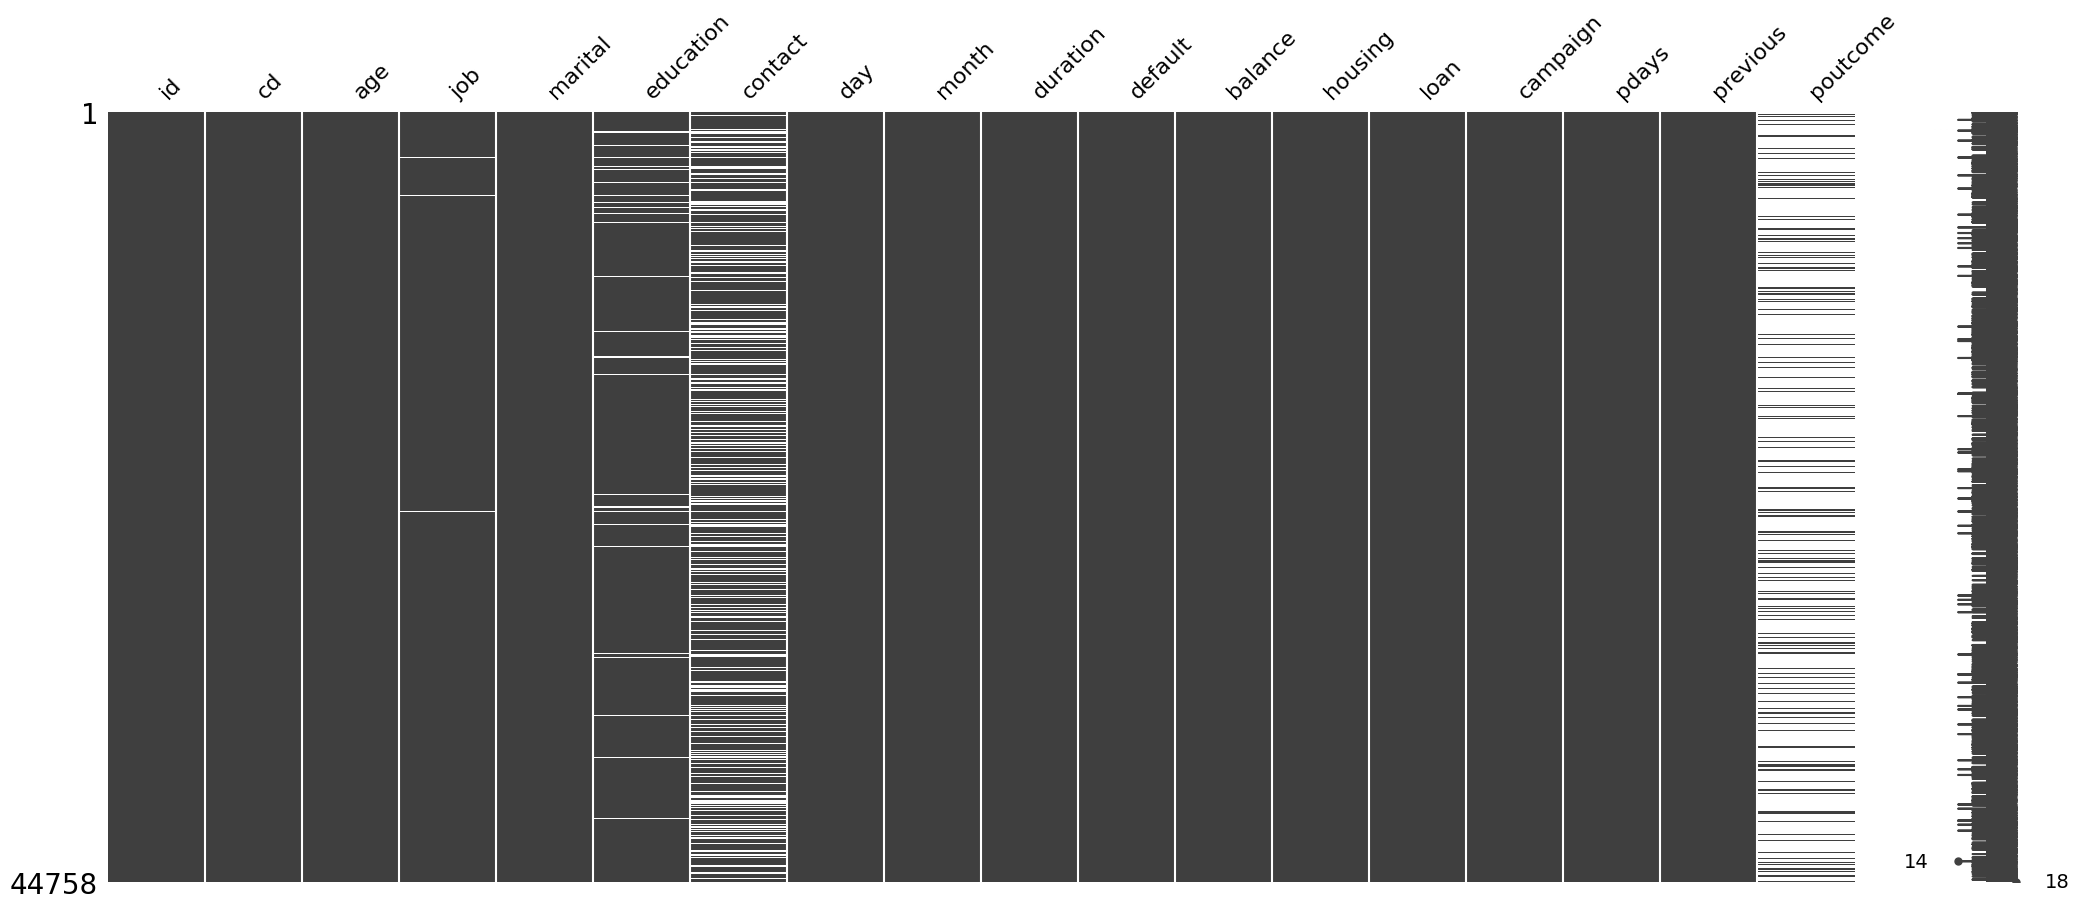

In [24]:
msno.matrix(train)

,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous
0,9b9c8baa,yes,46,blue-collar,married,secondary,8,jul,576,no,922,yes,no,1,-1,0
1,15f5f67c,no,48,technician,married,secondary,29,jan,414,no,101,yes,no,2,192,3
2,a9d47376,no,29,blue-collar,single,secondary,11,may,262,no,9,yes,no,3,-1,0
3,8278ef13,no,29,self-employed,single,secondary,28,jan,132,no,0,no,no,2,-1,0
4,dbee0db0,yes,69,retired,married,primary,4,feb,136,no,324,no,no,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44753,59058830,no,38,services,married,secondary,5,jun,115,no,5,no,no,2,-1,0
44754,9616db57,no,51,blue-collar,married,primary,21,aug,234,no,0,no,no,4,-1,0
44755,86969b88,no,31,admin.,single,secondary,25,may,159,no,8626,no,no,1,111,1
44756,53ac02f8,no,41,management,divorced,tertiary,3,feb,475,no,0,no,no,3,-1,0


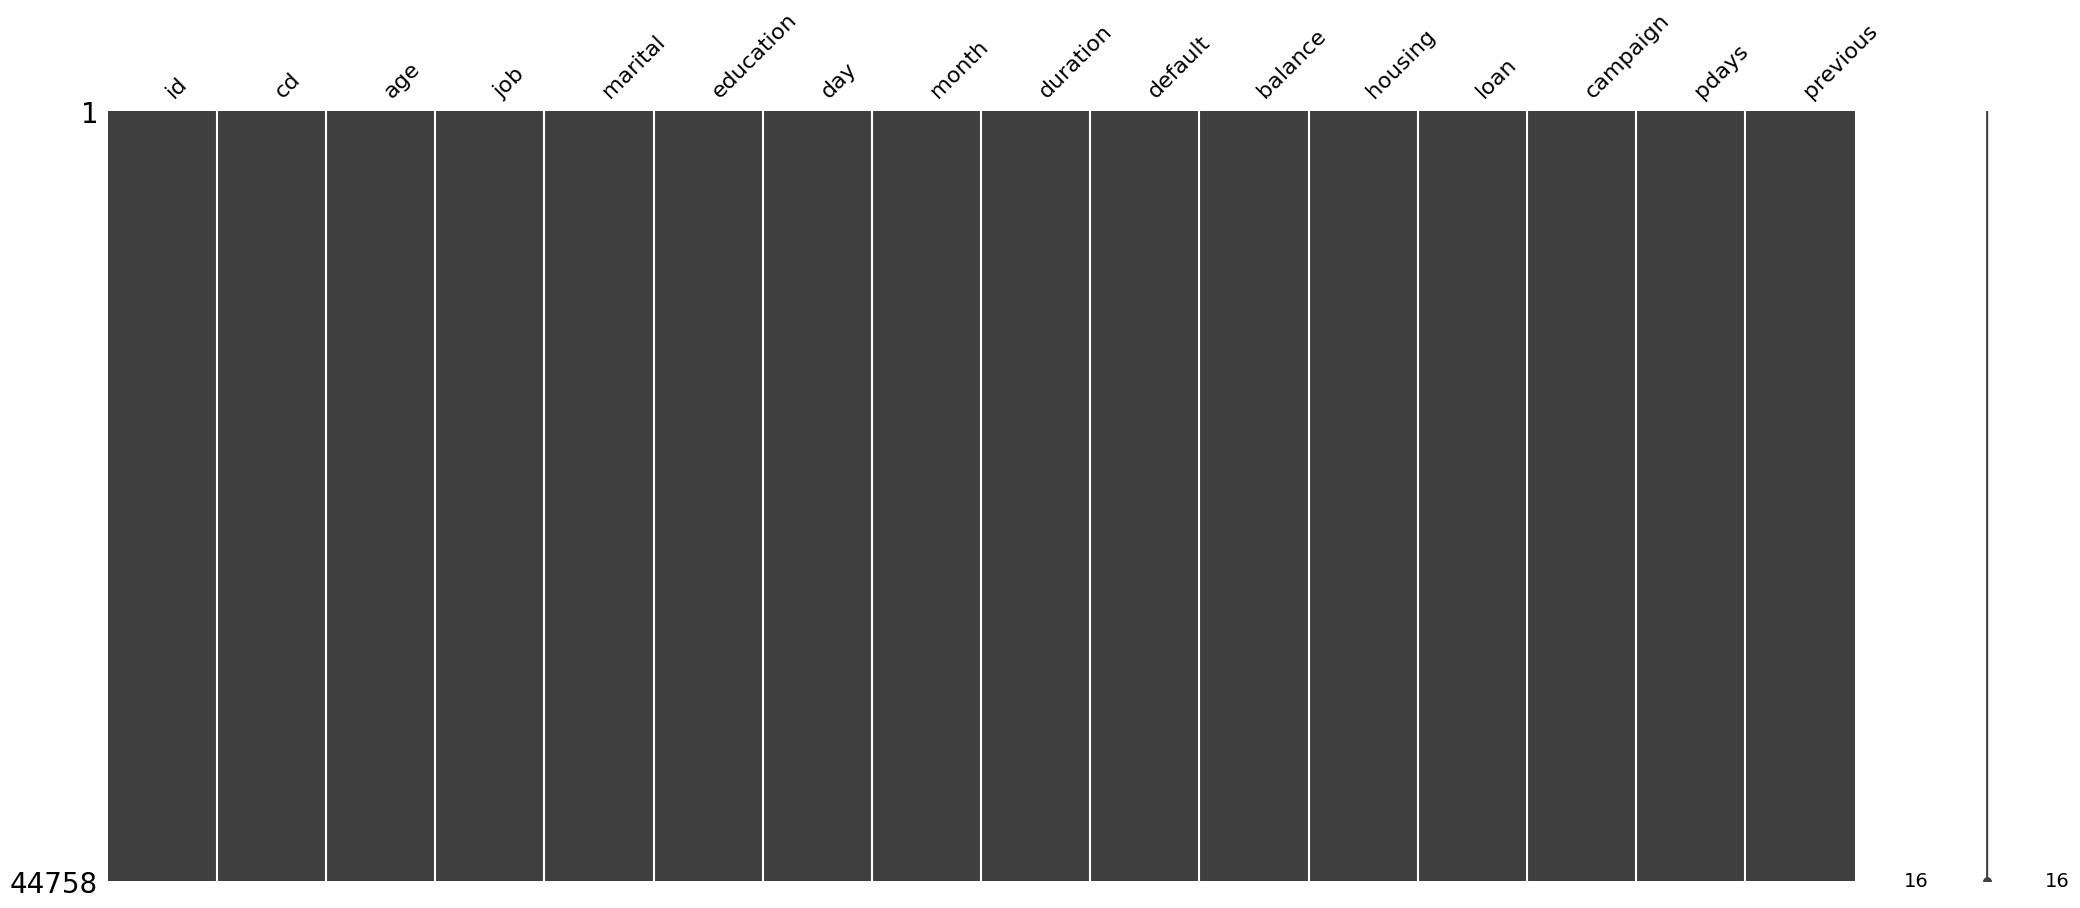

In [25]:
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent'
)
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(train)

msno.matrix(train)
plt.show()

Para evitar la fuga de datos o *data leakage*, utilizamos el mismo imputador ajustado en los datos del conjunto de entrenamiento, sobre el conjunto de *test*.

,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous
0,b3b494ee,no,31,technician,single,secondary,27,aug,313,no,46,no,no,6,-1,0
1,ee7f27b2,no,41,technician,single,secondary,12,may,127,no,3652,yes,no,1,363,2
2,657879f1,yes,64,retired,married,secondary,20,apr,1422,no,571,yes,no,2,-1,0
3,62f01744,no,38,admin.,single,secondary,6,may,211,no,221,yes,no,2,-1,0
4,2d20aeba,yes,47,management,single,tertiary,5,aug,253,no,86,no,no,1,97,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,3f6a2840,no,52,admin.,married,primary,7,may,82,no,448,yes,no,1,-1,0
4970,f3184e54,no,34,blue-collar,married,primary,8,may,220,no,298,yes,no,2,-1,0
4971,cdc47389,no,30,services,married,secondary,4,jul,407,no,137,no,no,1,-1,0
4972,ac73d37a,no,44,unemployed,married,secondary,30,jan,262,no,1309,no,no,2,-1,0


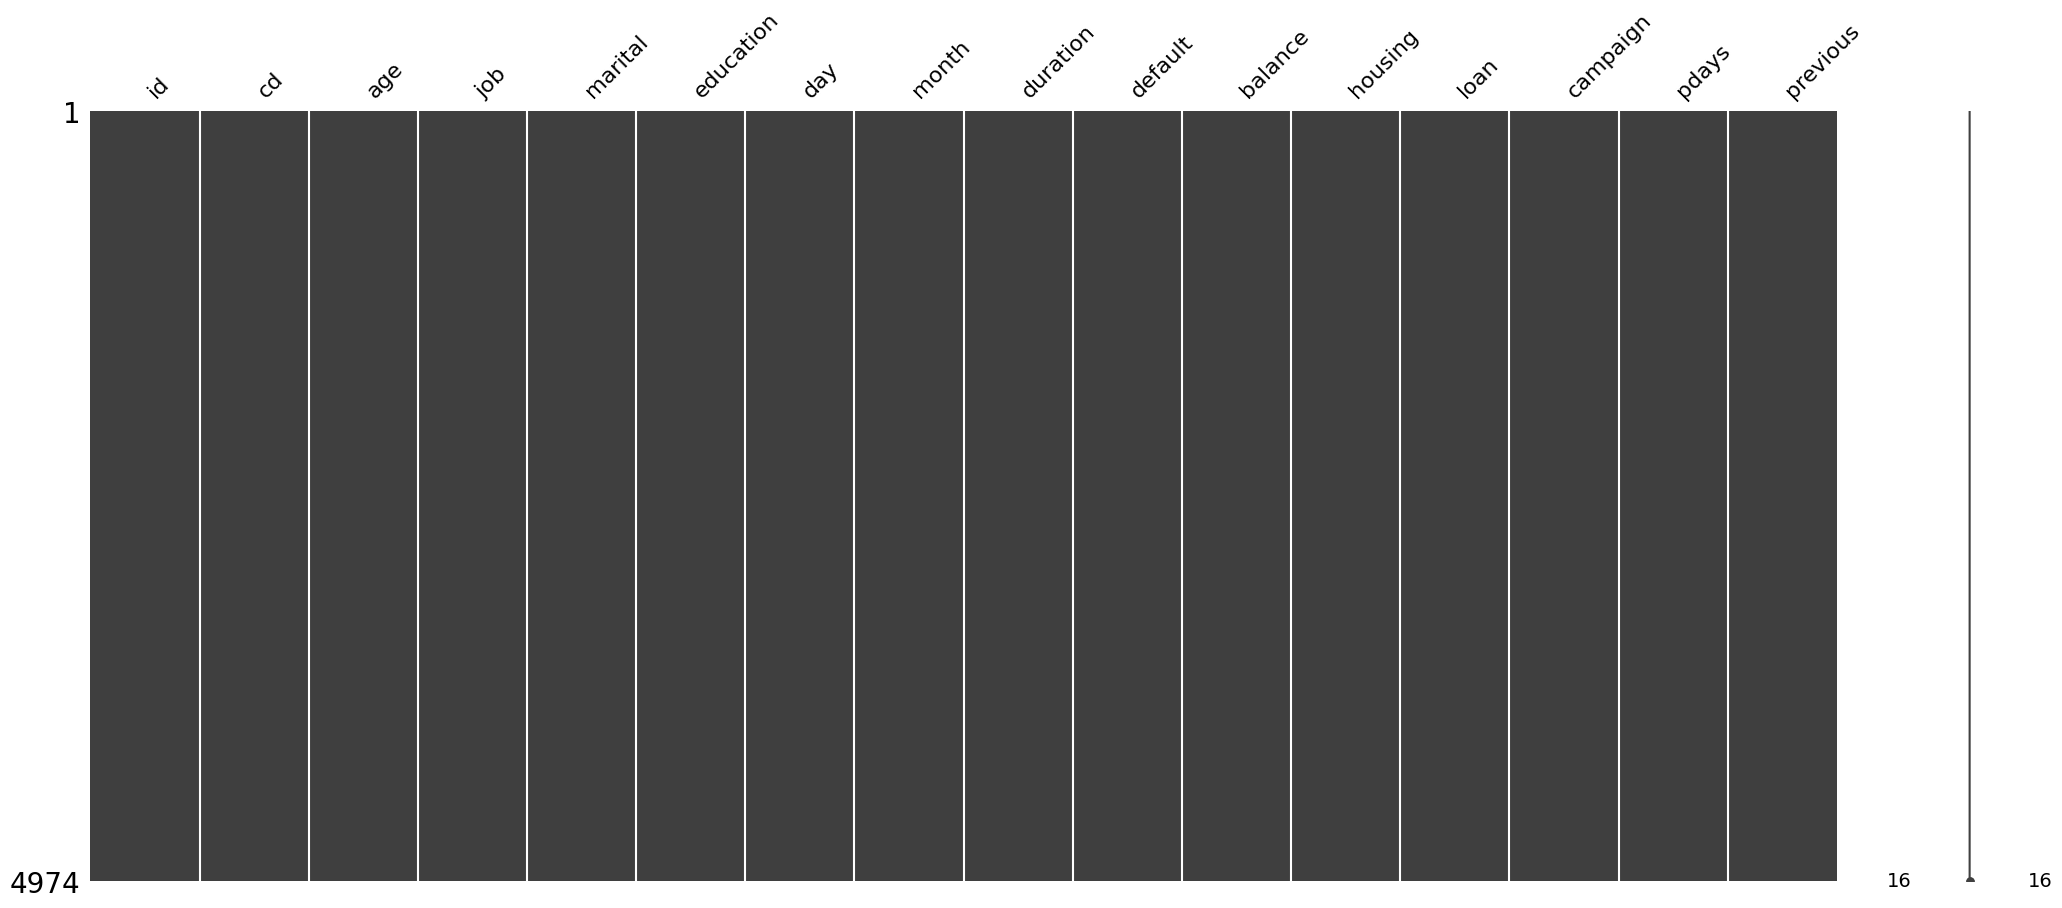

In [26]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True)

with pd.option_context('display.max_columns', None):
    display(test)

msno.matrix(test)
plt.show()

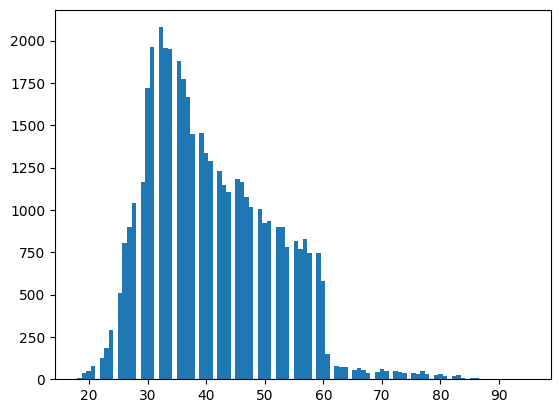

In [27]:
import matplotlib.pyplot as plt


plt.hist(train['age'], bins=100)
plt.show()

<a id="i-imputacion"></a>
## 5. Transformación

En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [28]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65, 75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

with pd.option_context('display.max_columns', None):
    display(train)

,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age
0,9b9c8baa,yes,46,blue-collar,married,secondary,8,jul,576,no,922,yes,no,1,-1,0,4
1,15f5f67c,no,48,technician,married,secondary,29,jan,414,no,101,yes,no,2,192,3,4
2,a9d47376,no,29,blue-collar,single,secondary,11,may,262,no,9,yes,no,3,-1,0,2
3,8278ef13,no,29,self-employed,single,secondary,28,jan,132,no,0,no,no,2,-1,0,2
4,dbee0db0,yes,69,retired,married,primary,4,feb,136,no,324,no,no,4,-1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44753,59058830,no,38,services,married,secondary,5,jun,115,no,5,no,no,2,-1,0,3
44754,9616db57,no,51,blue-collar,married,primary,21,aug,234,no,0,no,no,4,-1,0,4
44755,86969b88,no,31,admin.,single,secondary,25,may,159,no,8626,no,no,1,111,1,2
44756,53ac02f8,no,41,management,divorced,tertiary,3,feb,475,no,0,no,no,3,-1,0,3


In [29]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

train["pdays"] = train["pdays"].replace(-1, 0)
test["pdays"] = test["pdays"].replace(-1, 0)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `month`: Usaremos *one-hot encoding*.
<!-- - `poutcome` : Usaremos *one-hot encoding*. -->

In [30]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
# train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
test['education'] = laenc.fit_transform(test['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job'),
    pd.get_dummies(train["marital"], prefix='marital'),
    pd.get_dummies(train["month"], prefix='month')
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job'),
    pd.get_dummies(test["marital"], prefix='marital'),
    pd.get_dummies(test["month"], prefix='month')
], axis=1)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (44758, 43)


,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,9b9c8baa,1,46,blue-collar,married,1,8,jul,576,0,922,1,0,1,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,15f5f67c,0,48,technician,married,1,29,jan,414,0,101,1,0,2,192,3,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,a9d47376,0,29,blue-collar,single,1,11,may,262,0,9,1,0,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,8278ef13,0,29,self-employed,single,1,28,jan,132,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,dbee0db0,1,69,retired,married,0,4,feb,136,0,324,0,0,4,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [31]:
train["month"] = train["month"].replace(
    list(train["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)
test["month"] = test["month"].replace(
    list(test["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)

train["year"] = pd.Series([2022] * len(train))
train["date"] = pd.to_datetime(train[['year', 'month', 'day']])

test["year"] = pd.Series([2023] * len(test))
test["date"] = pd.to_datetime(test[['year', 'month', 'day']])

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (44758, 45)


,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,9b9c8baa,1,46,blue-collar,married,1,8,7,576,0,922,1,0,1,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2022,2022-07-08
1,15f5f67c,0,48,technician,married,1,29,1,414,0,101,1,0,2,192,3,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,2022-01-29
2,a9d47376,0,29,blue-collar,single,1,11,5,262,0,9,1,0,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-11
3,8278ef13,0,29,self-employed,single,1,28,1,132,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2022,2022-01-28
4,dbee0db0,1,69,retired,married,0,4,2,136,0,324,0,0,4,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2022,2022-02-04



[INFO] Testing dataset dimnesions (rows, cols): (4974, 45)


,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,b3b494ee,0,31,technician,single,1,27,8,313,0,46,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2023,2023-08-27
1,ee7f27b2,0,41,technician,single,1,12,5,127,0,3652,1,0,1,363,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-12
2,657879f1,1,64,retired,married,1,20,4,1422,0,571,1,0,2,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2023,2023-04-20
3,62f01744,0,38,admin.,single,1,6,5,211,0,221,1,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-06
4,2d20aeba,1,47,management,single,2,5,8,253,0,86,0,0,1,97,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2023,2023-08-05


In [32]:
!pip install -U feature-engine

`CyclicalFeatures()` aplica transformaciones cíclicas a variables numéricas, devolviendo 2 nuevas características por cada variable, según:

$$var\_sin = \sin(variable * (2. * pi / max\_value))$$

$$var\_cos = \cos(variable * (2. * pi / max\_value))$$

In [33]:
from feature_engine.creation import CyclicalFeatures


cyc_enc = CyclicalFeatures()
cyc_enc.fit(train[["day", "month"]])
train = pd.concat(
    [train, cyc_enc.transform(train[["day", "month"]])],
axis=1)

test = pd.concat(
    [test, cyc_enc.transform(test[["day", "month"]])],
axis=1)

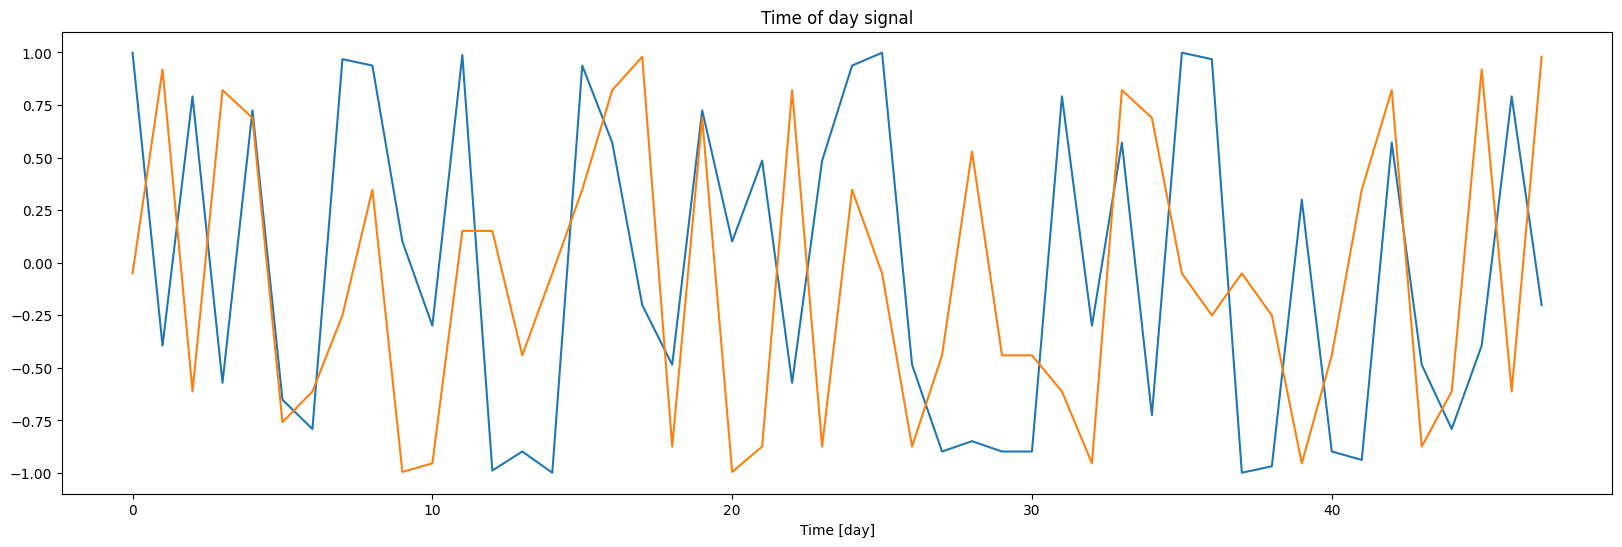

In [34]:
plt.figure(figsize=(20, 6))
plt.plot(train['day_sin'][0:48])#.unique())
plt.plot(train['day_cos'][0:48]) #.unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

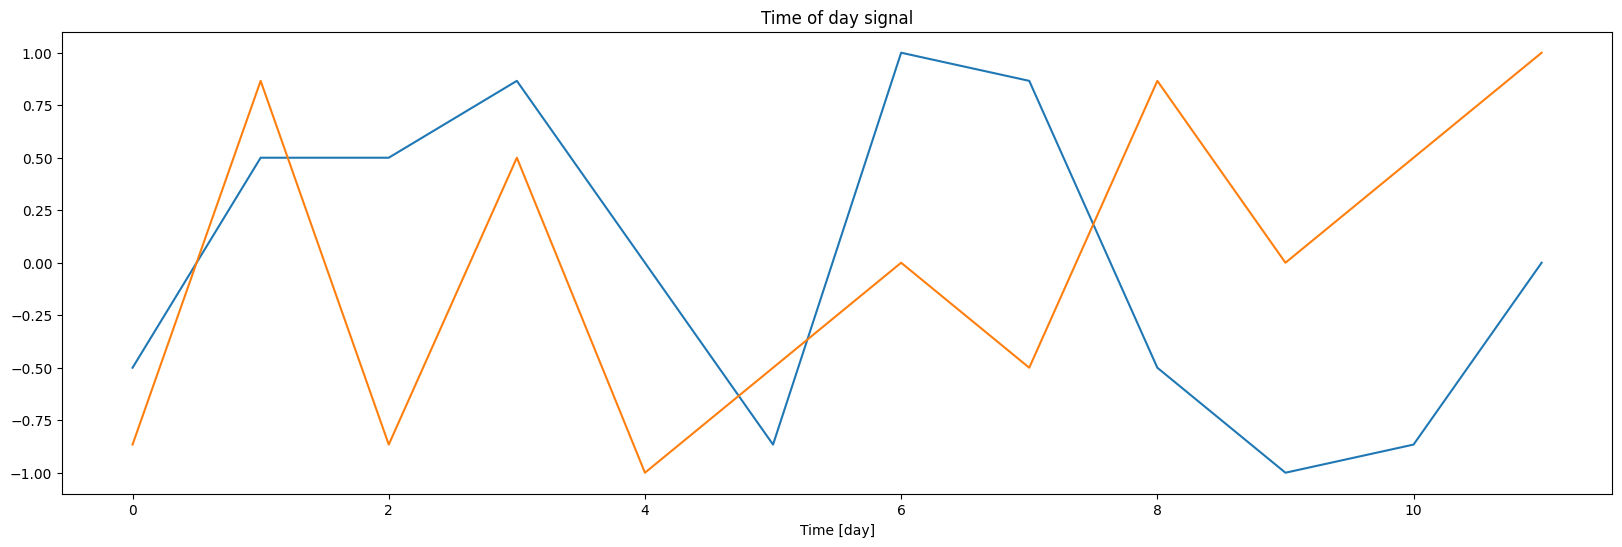

In [35]:
plt.figure(figsize=(20, 6))
plt.plot(train['month_sin'].unique())
plt.plot(train['month_cos'].unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

Efectuamos nuevamente la etapa EDA para generar más observaciones acerca de las características ya transformadas.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_corr(data: pd.DataFrame, title: str, method: str = "pearson", annot: bool = True):
    f,ax = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data.corr(method=method),
        vmin=-1,
        vmax=1,
        annot=annot,
        linewidths=.5,
        fmt='.2f',
        ax=ax
    )
    plt.title(f"{method.title()}'s Correlation Coefficient between {title}")
    return ax

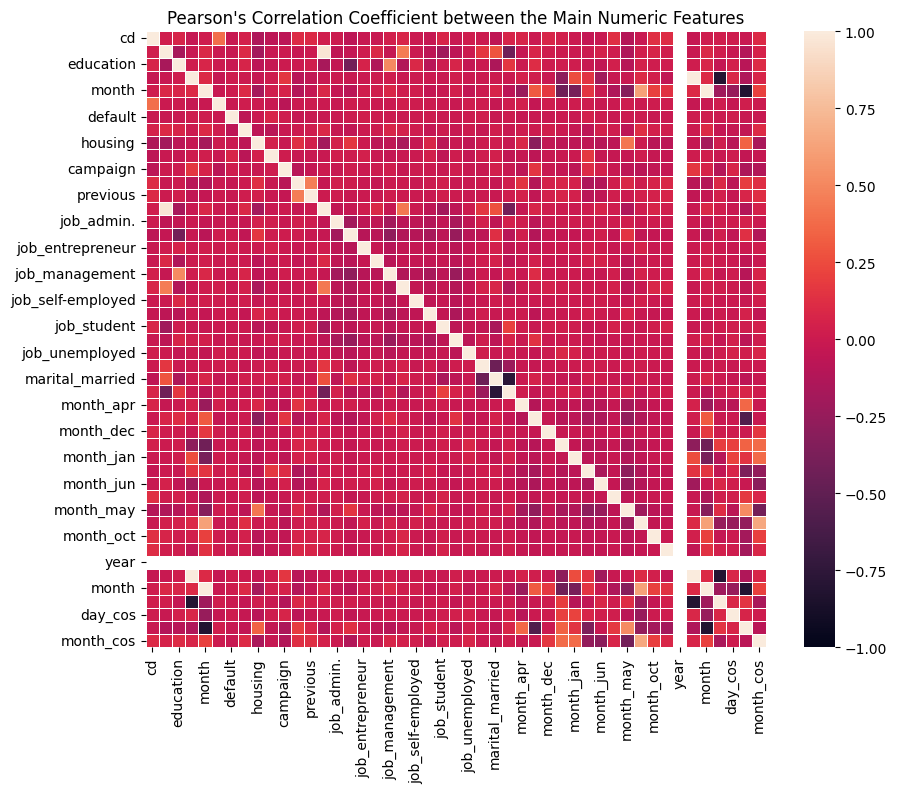

In [37]:
ax = plot_corr(
    train.select_dtypes("number"),
    title="the Main Numeric Features",
    method="pearson",
    annot=False
)
plt.show()

In [38]:
with pd.option_context('display.max_columns', None):
    display(train.select_dtypes("number"))

,cd,age,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,day,month,day_sin,day_cos,month_sin,month_cos
0,1,46,1,8,7,576,0,922,1,0,1,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2022,8,7,0.998717,-0.050649,-5.000000e-01,-0.866025
1,0,48,1,29,1,414,0,101,1,0,2,192,3,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,29,1,-0.394356,0.918958,5.000000e-01,0.866025
2,0,29,1,11,5,262,0,9,1,0,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,11,5,0.790776,-0.612106,5.000000e-01,-0.866025
3,0,29,1,28,1,132,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2022,28,1,-0.571268,0.820763,5.000000e-01,0.866025
4,1,69,0,4,2,136,0,324,0,0,4,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2022,4,2,0.724793,0.688967,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44753,0,38,1,5,6,115,0,5,0,0,2,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2022,5,6,0.848644,0.528964,1.224647e-16,-1.000000
44754,0,51,0,21,8,234,0,0,0,0,4,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2022,21,8,-0.897805,-0.440394,-8.660254e-01,-0.500000
44755,0,31,1,25,5,159,0,8626,0,0,1,111,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,25,5,-0.937752,0.347305,5.000000e-01,-0.866025
44756,0,41,2,3,2,475,0,0,0,0,3,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2022,3,2,0.571268,0.820763,8.660254e-01,0.500000


**Reducción y selección de caracteristicas**

In [39]:
with pd.option_context('display.max_columns', None):
    display(train)

,id,cd,age,job,marital,education,day,month,duration,default,balance,housing,loan,campaign,pdays,previous,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date,day,month,day_sin,day_cos,month_sin,month_cos
0,9b9c8baa,1,46,blue-collar,married,1,8,7,576,0,922,1,0,1,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2022,2022-07-08,8,7,0.998717,-0.050649,-5.000000e-01,-0.866025
1,15f5f67c,0,48,technician,married,1,29,1,414,0,101,1,0,2,192,3,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2022,2022-01-29,29,1,-0.394356,0.918958,5.000000e-01,0.866025
2,a9d47376,0,29,blue-collar,single,1,11,5,262,0,9,1,0,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-11,11,5,0.790776,-0.612106,5.000000e-01,-0.866025
3,8278ef13,0,29,self-employed,single,1,28,1,132,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2022,2022-01-28,28,1,-0.571268,0.820763,5.000000e-01,0.866025
4,dbee0db0,1,69,retired,married,0,4,2,136,0,324,0,0,4,0,0,6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2022,2022-02-04,4,2,0.724793,0.688967,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44753,59058830,0,38,services,married,1,5,6,115,0,5,0,0,2,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2022,2022-06-05,5,6,0.848644,0.528964,1.224647e-16,-1.000000
44754,9616db57,0,51,blue-collar,married,0,21,8,234,0,0,0,0,4,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2022,2022-08-21,21,8,-0.897805,-0.440394,-8.660254e-01,-0.500000
44755,86969b88,0,31,admin.,single,1,25,5,159,0,8626,0,0,1,111,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-25,25,5,-0.937752,0.347305,5.000000e-01,-0.866025
44756,53ac02f8,0,41,management,divorced,2,3,2,475,0,0,0,0,3,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2022,2022-02-03,3,2,0.571268,0.820763,8.660254e-01,0.500000


In [40]:
baseline_features = [
       'age', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'
]
features = [
       'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'cat_age'
]

target = 'cd'

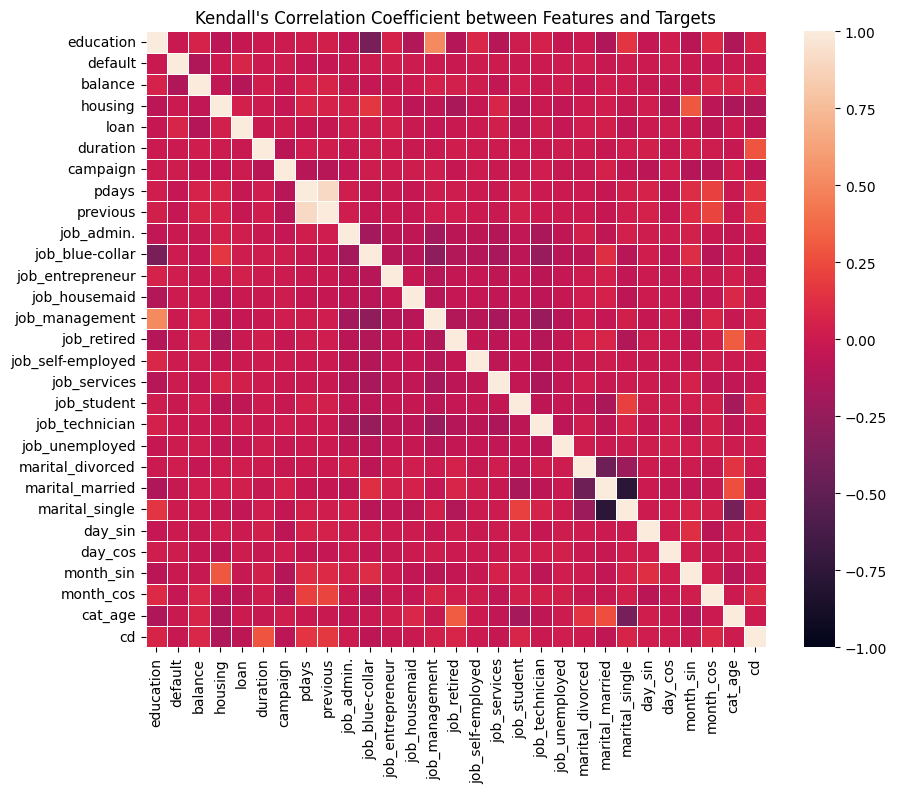

In [41]:
ax = plot_corr(
    train[features + [target]],
    title="Features and Targets",
    method="kendall",
    annot=False
)
plt.show()

<a id="ejercicios"></a>
## 6. Ejercicios caso práctico: "Análisis de Datos con Python"

1. Replique (**EN LO QUE SEA POSIBLE**) toda la fase de "Preparación de datos" presentada en este `Jupyter notebook`, para el *dataset* que se descargará y descomprimirá  al ejecutar la siguiente celda de codigo:

In [42]:
import os
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "splitted-titanic-dataset"
DATA_PATH = f"datasets/{DATASET}/"


def load_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_dataset(dataset=DATASET)

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Dataset 'splitted-titanic-dataset' downloaded and uncompressed correctly!
[INFO] Los archivos presentes en "datasets/splitted-titanic-dataset/":

['admin.csv', 'passengers.xlsx', '.ipynb_checkpoints', 'coast_guard.csv']


<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joefavergel@gmail.com">joefavergel@gmail.com</a> o directamente en el repositorio.</p>